<a href="https://colab.research.google.com/github/Leostark95/Introduccion_IA/blob/main/lab_06_02_nmf_face_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 06.02 - NMF face search

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L06.02", varname="student");

logging in as alexander.amaya@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2024.2
success!! you are logged in
-------------


## Dataset

we will use the faces dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:

import numpy as np
faces = np.load("local/data/faces.npy")
faces.shape


(535, 361)

In [ ]:
def plot_faces(faces):
    assert len(faces)<=30, "can only plot at most 30 faces"
    plt.figure(figsize=(15,2))
    for i in range(len(faces)):
        plt.subplot(2,15,i+1)
        plt.imshow(faces[i].reshape(19,19), cmap=plt.cm.Greys_r)
        plt.xticks([]); plt.yticks([])

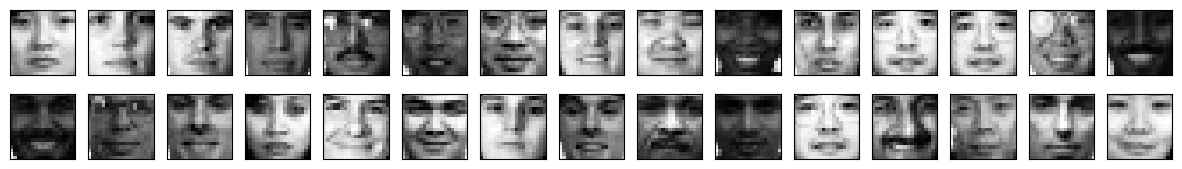

In [ ]:

plot_faces(np.random.permutation(faces)[:30])


## Task 1: Distance function for a vector

complete the following function so that given a vector $v \in \mathbb{R}^n$ and a `numpy` array $X \in \mathbb{R}^{m\times n}$ (whose rows are vectors of the same size as $v$) returns a new array $\in \mathbb{R}^m$ with the Euclidean distance between $v$ and each vector in $X$.

Recall that the Euclidean distance between vectors $z=[z_0,...z_{n-1}]$ and $w=[w_0,...,w_{n-1}]$ is given by

$$\text{distance}(z,w) = \sqrt{\sum_{i=0}^{n-1} (z_i-w_i)^2}$$


**hint**: use [`np.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) to compute a distance between two vectors

**challenge**: solve it using one line of code.

**note**: your function must return a 1D numpy array of dimension $m$, not a list.

for instance, for the following values of $v$ and $X$

    X = array([[9, 5, 1, 3, 8, 3, 3, 3, 9, 2],
               [9, 7, 0, 7, 9, 1, 4, 7, 3, 6],
               [8, 0, 0, 5, 0, 5, 5, 1, 1, 5],
               [8, 2, 9, 5, 6, 0, 8, 7, 2, 8],
               [0, 6, 3, 0, 6, 6, 1, 2, 8, 0]])
                  
    v = np.array([9, 7, 0, 7, 9, 1, 4, 7, 3, 6])


you should get the following result

    array([ 9.74679434,  0.        , 13.89244399, 11.91637529, 16.40121947])


In [ ]:
X = np.array([[9, 5, 1, 3, 8, 3, 3, 3, 9, 2],
           [9, 7, 0, 7, 9, 1, 4, 7, 3, 6],
           [8, 0, 0, 5, 0, 5, 5, 1, 1, 5],
           [8, 2, 9, 5, 6, 0, 8, 7, 2, 8],
           [0, 6, 3, 0, 6, 6, 1, 2, 8, 0]])

v = np.array([9, 7, 0, 7, 9, 1, 4, 7, 3, 6])

print(v[0])
print(X[0][0])

9
9


In [ ]:
def distances(X, v):
    return np.sqrt(np.sum((X - v)**2, axis=1))

check manually your code

In [ ]:
X = np.random.randint(10, size=(5,10))
v = X[1]

print ("X=\n", X)
print ("\nv=", v)
distances(v, X)

X=
 [[9 2 1 1 1 0 7 8 2 4]
 [4 6 6 8 8 7 5 4 4 0]
 [0 3 2 6 4 6 0 7 7 4]
 [7 4 6 7 3 9 4 3 9 5]
 [8 6 3 0 3 7 5 7 4 9]]

v= [4 6 6 8 8 7 5 4 4 0]


array([15.90597372,  0.        , 11.        ,  9.74679434, 14.28285686])

In [ ]:
X = np.array([[1, 5, 1, 4, 8],
              [9, 7, 0, 7, 9],
              [0, 6, 3, 0, 6]])
v = np.array([9, 7, 0, 7, 9])

In [ ]:
distances(v,X)

array([ 8.88819442,  0.        , 12.20655562])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Positions of closest vectors

complete the following function so that given $v$ and $X$ as previously, returns the positions of the $n$ closest vectors to $v$ in $X$.

**hint**: use the [`np.argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) function

**challenge**: solve it using one line of code

for the example $v$ and $X$ above you should get the following outputs

    >> closest(v, X, 2)
    array([1, 0])

    >> closest(v, X, 3)
    array([1, 0, 3])


In [ ]:
def closest(v, X, n):

  def distances(X, v):
    return np.sqrt(np.sum((X - v)**2, axis=1))

  distancias = distances(v, X)
  return np.argsort(distancias)[:n]

check manually your code

In [ ]:
X = np.random.randint(10, size=(5,10))
v = X[1]

print ("X=\n", X)
print ("\nv=", v,"\n\n")
print (closest(v, X, 2))
print (closest(v, X, 3))

X=
 [[2 2 6 5 6 9 6 5 8 9]
 [7 9 4 5 4 0 0 8 9 4]
 [5 8 4 9 7 3 7 1 7 9]
 [2 2 8 8 4 4 3 8 7 7]
 [0 5 0 0 8 4 2 0 5 5]]

v= [7 9 4 5 4 0 0 8 9 4] 


[1 3]
[1 3 2]


### observe now how we can use your functions to search for faces similar to any other face

TARGET FACE


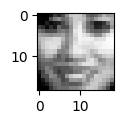

In [ ]:

plt.figure(figsize=(1,1))
fi = 314 # np.random.randint(len(faces)) # 314
face = faces[fi]
plt.imshow(faces[fi].reshape(19,19), cmap=plt.cm.Greys_r)
print ("TARGET FACE")


SIMILAR FACES


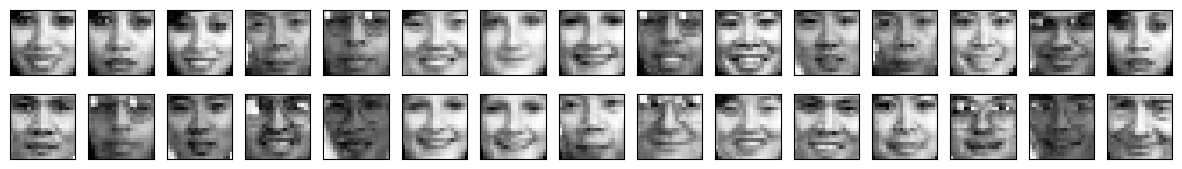

In [ ]:

plot_faces(faces[closest(face, faces, 30)])
print ("SIMILAR FACES")


But they do not look so similar, this is because we are doing comparison **pixel by pixel**. We will fix this in the next task

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Use NMF to find similar faces

Make the comparison in the faces space resulting from transforming them using NMF. For this you have to:

- create an instance of NMF with `n_components=30, init="random", random_state=0`
- fit the instance with $X$
- transform $X$
- transform $v$
- return the positions of closest $n$ vectors in the transformed $X$ to the transformed $v$

For the target face above, you should get the following

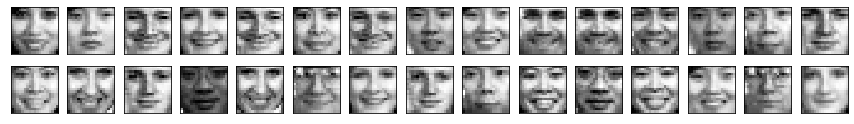

In [ ]:

from IPython.display import Image
Image(filename='local/imgs/similar-images2.png')


In [ ]:
import numpy as np
from sklearn.decomposition import NMF

def find_similar(v, X, n):
    import numpy as np
    from sklearn.decomposition import NMF
    nmf = NMF(n_components=30, init="random", random_state=0)
    nmf.fit(X)
    Xt = nmf.transform(X)
    vt = nmf.transform(v.reshape(1,-1))

    def closest(v, X, n):
        def distances(X, v):
            return np.sqrt(np.sum((X - v)**2, axis=1))

        distancias = distances(Xt, vt)
        return np.argsort(distancias)[:n]

    result = closest(vt, Xt, n)
    return result

check manually your answer

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


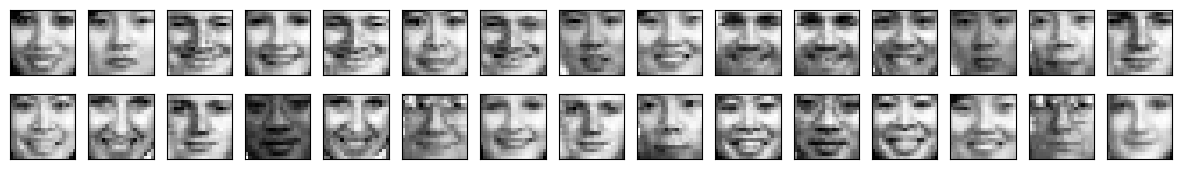

In [ ]:

plot_faces(faces[find_similar(face, faces, 30)])


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");